In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

In [14]:
matches = pd.read_csv("epl_results_2022-23.csv")

In [15]:
matches.head(10)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,...,2,2,16,11,3,5,1,2,0,0
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,H,...,3,4,7,9,4,4,2,0,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,H,...,3,2,18,16,5,5,3,3,0,0
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,D,...,4,6,13,9,6,4,2,0,0,0
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,D,...,10,0,9,14,11,1,0,3,0,0
5,06/08/2022,15:00,Tottenham,Southampton,4,1,H,2,1,H,...,8,2,11,6,10,2,3,0,0,0
6,06/08/2022,17:30,Everton,Chelsea,0,1,A,0,1,A,...,4,6,14,11,4,16,3,2,0,0
7,07/08/2022,14:00,Leicester,Brentford,2,2,D,1,0,H,...,5,3,6,5,5,6,0,0,0,0
8,07/08/2022,14:00,Man United,Brighton,1,2,A,0,2,A,...,5,4,7,12,6,2,4,1,0,0
9,07/08/2022,16:30,West Ham,Man City,0,2,A,0,1,A,...,1,2,8,4,1,4,0,1,0,0


In [16]:
matches.shape

(380, 23)

In [17]:
home = matches["HomeTeam"].value_counts()
home

Crystal Palace    19
Fulham            19
Chelsea           19
Nottingham        19
Brentford         19
Wolves            19
Southampton       19
Man City          19
Brighton          19
Arsenal           19
Aston Villa       19
West Ham          19
Man United        19
Leicester         19
Everton           19
Tottenham         19
Newcastle         19
Leeds             19
Bournemouth       19
Liverpool         19
Name: HomeTeam, dtype: int64

In [18]:
away = matches["AwayTeam"].value_counts()
away

Arsenal           19
Liverpool         19
Tottenham         19
West Ham          19
Man United        19
Fulham            19
Leeds             19
Bournemouth       19
Newcastle         19
Leicester         19
Everton           19
Man City          19
Brighton          19
Brentford         19
Chelsea           19
Southampton       19
Nottingham        19
Wolves            19
Aston Villa       19
Crystal Palace    19
Name: AwayTeam, dtype: int64

In [19]:
total = home + away
total

Arsenal           38
Aston Villa       38
Bournemouth       38
Brentford         38
Brighton          38
Chelsea           38
Crystal Palace    38
Everton           38
Fulham            38
Leeds             38
Leicester         38
Liverpool         38
Man City          38
Man United        38
Newcastle         38
Nottingham        38
Southampton       38
Tottenham         38
West Ham          38
Wolves            38
dtype: int64

In [20]:
matches.dtypes

Date        object
Time        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
Referee     object
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
AR           int64
dtype: object

In [21]:
matches.info

<bound method DataFrame.info of            Date   Time        HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0    05/08/2022  20:00  Crystal Palace      Arsenal     0     2   A     0   
1    06/08/2022  12:30          Fulham    Liverpool     2     2   D     1   
2    06/08/2022  15:00     Bournemouth  Aston Villa     2     0   H     1   
3    06/08/2022  15:00           Leeds       Wolves     2     1   H     1   
4    06/08/2022  15:00       Newcastle   Nottingham     2     0   H     0   
..          ...    ...             ...          ...   ...   ...  ..   ...   
375  28/05/2023  16:30         Everton  Bournemouth     1     0   H     0   
376  28/05/2023  16:30           Leeds    Tottenham     1     4   A     0   
377  28/05/2023  16:30       Leicester     West Ham     2     1   H     1   
378  28/05/2023  16:30      Man United       Fulham     2     1   H     1   
379  28/05/2023  16:30     Southampton    Liverpool     4     4   D     2   

     HTAG HTR  ... HST  AST  HF  AF  HC  AC

In [22]:
matches.isnull().sum()

Date        0
Time        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [23]:
columns_to_drop = ['Referee','HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
matches.drop(columns=columns_to_drop, inplace=True)

In [24]:
matches.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,10,10,2,2
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,H,9,11,3,4
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,H,7,15,3,2
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,D,12,15,4,6
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,D,23,5,10,0


In [25]:
columns_to_drop = ['HTHG','HTAG', 'HTR']
matches.drop(columns=columns_to_drop, inplace=True)

In [26]:
matches.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,10,10,2,2
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,9,11,3,4
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,7,15,3,2
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,12,15,4,6
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,23,5,10,0


In [27]:
matches['hwin'] = matches['FTR'].apply(lambda x: 1 if x == 'H' else 0)

In [28]:
matches['awin'] = matches['FTR'].apply(lambda x: 1 if x == 'A' else 0)

In [30]:
matches

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,hwin,awin
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,10,10,2,2,0,1
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,9,11,3,4,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,7,15,3,2,1,0
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,12,15,4,6,1,0
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,23,5,10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,28/05/2023,16:30,Everton,Bournemouth,1,0,H,13,7,6,2,1,0
376,28/05/2023,16:30,Leeds,Tottenham,1,4,A,19,11,2,7,0,1
377,28/05/2023,16:30,Leicester,West Ham,2,1,H,13,16,4,3,1,0
378,28/05/2023,16:30,Man United,Fulham,2,1,H,21,10,8,3,1,0


In [56]:
home_teams = matches.groupby('HomeTeam').agg({
    'FTHG': 'sum',
    'FTAG': 'sum',
    'hwin': 'sum',
    'AwayTeam': 'count'
}).reset_index()

In [57]:
home_teams.columns = ['Team', 'GoalsScoredAtHome', 'GoalsConcededAtHome', 'WinsAtHome', 'Games']

In [58]:
home_teams

,Team,GoalsScoredAtHome,GoalsConcededAtHome,WinsAtHome,Games
0,Arsenal,53,25,14,19
1,Aston Villa,33,21,12,19
2,Bournemouth,20,28,6,19
3,Brentford,35,18,10,19
4,Brighton,37,21,10,19
5,Chelsea,20,19,6,19
6,Crystal Palace,21,23,7,19
7,Everton,16,27,6,19
8,Fulham,31,29,8,19
9,Leeds,26,37,5,19


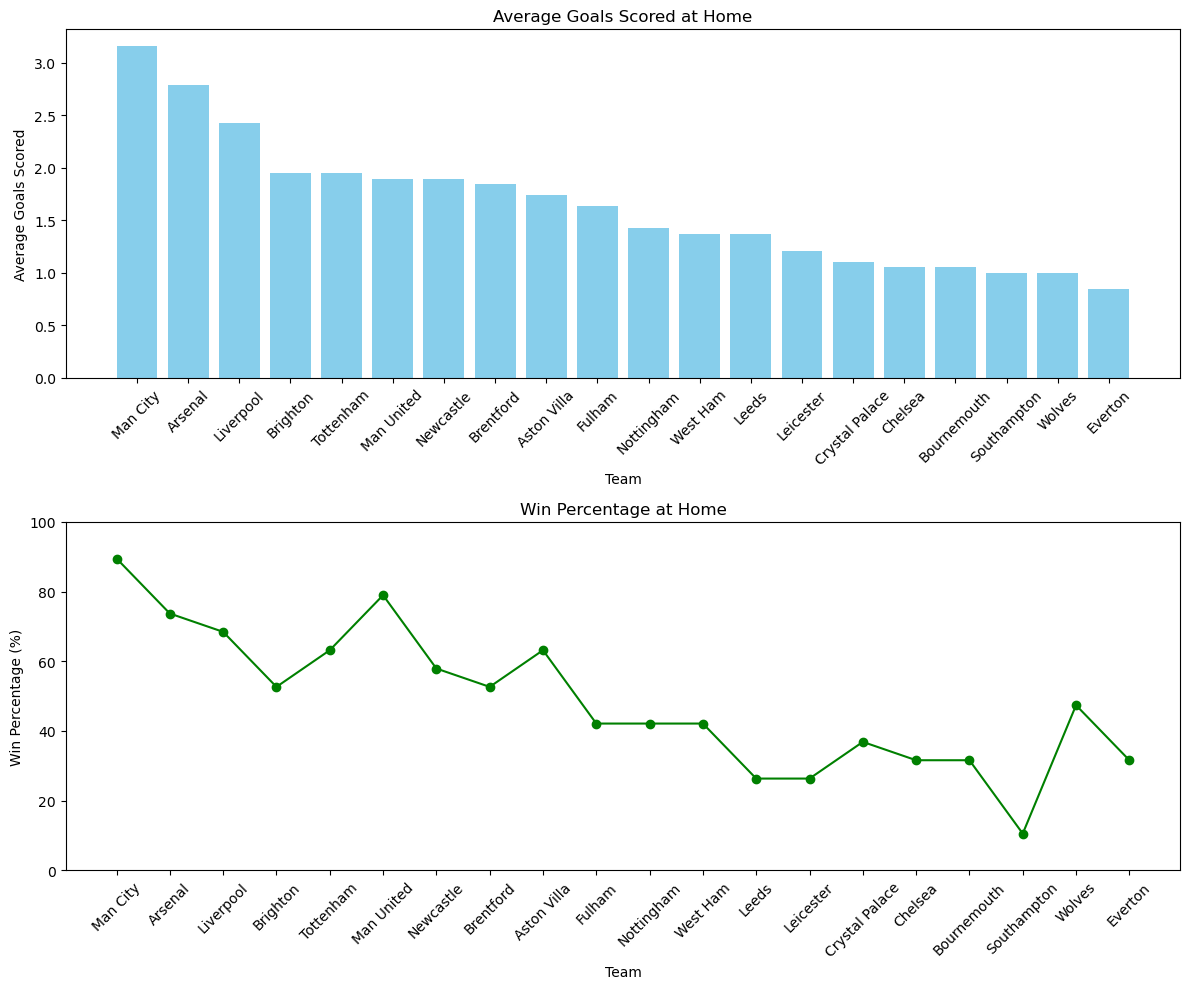

In [59]:
df = pd.DataFrame(home_teams)

# Calculate average goals scored per game at home and win percentage at home
df['AvgGoalsScoredAtHome'] = df['GoalsScoredAtHome'] / df['Games']
df['WinPercentageAtHome'] = (df['WinsAtHome'] / df['Games']) * 100

# Sort the DataFrame by average goals scored at home for better visualization
df_sorted = df.sort_values(by='AvgGoalsScoredAtHome', ascending=False)

# Create plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot 1: Bar plot for average goals scored at home
axes[0].bar(df_sorted['Team'], df_sorted['AvgGoalsScoredAtHome'], color='skyblue')
axes[0].set_title('Average Goals Scored at Home')
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Average Goals Scored')

# Plot 2: Line plot for win percentage at home
axes[1].plot(df_sorted['Team'], df_sorted['WinPercentageAtHome'], marker='o', color='green')
axes[1].set_title('Win Percentage at Home')
axes[1].set_xlabel('Team')
axes[1].set_ylabel('Win Percentage (%)')
axes[1].set_ylim(0, 100)  # Set y-axis limit from 0 to 100 for percentage

# Rotate x-axis labels for better visibility
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

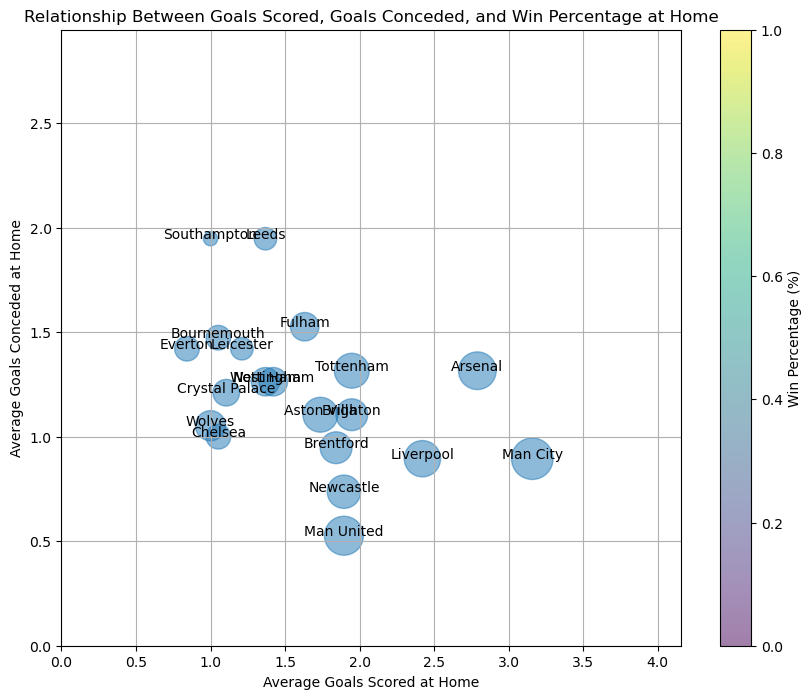

In [60]:
# Calculate average goals scored per game at home, average goals conceded per game at home,
# and win percentage at home
df['AvgGoalsScoredAtHome'] = df['GoalsScoredAtHome'] / df['Games']
df['AvgGoalsConcededAtHome'] = df['GoalsConcededAtHome'] / df['Games']
df['WinPercentageAtHome'] = (df['WinsAtHome'] / df['Games']) * 100

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['AvgGoalsScoredAtHome'], df['AvgGoalsConcededAtHome'], s=df['WinPercentageAtHome']*10, alpha=0.5)
plt.title('Relationship Between Goals Scored, Goals Conceded, and Win Percentage at Home')
plt.xlabel('Average Goals Scored at Home')
plt.ylabel('Average Goals Conceded at Home')
plt.xlim(0, max(df['AvgGoalsScoredAtHome']) + 1)  # Set x-axis limit
plt.ylim(0, max(df['AvgGoalsConcededAtHome']) + 1)  # Set y-axis limit

# Add team labels to each point
for i, txt in enumerate(df['Team']):
    plt.annotate(txt, (df['AvgGoalsScoredAtHome'][i], df['AvgGoalsConcededAtHome'][i]), ha='center')

plt.colorbar(label='Win Percentage (%)')
plt.grid(True)
plt.show()

In [63]:
away_teams = matches.groupby('AwayTeam').agg({
    'FTHG': 'sum',
    'FTAG': 'sum',
    'awin': 'sum',
    'HomeTeam': 'count'
}).reset_index()

In [64]:
away_teams

,AwayTeam,FTHG,FTAG,awin,HomeTeam
0,Arsenal,18,35,12,19
1,Aston Villa,25,18,6,19
2,Bournemouth,43,17,5,19
3,Brentford,28,23,5,19
4,Brighton,32,35,8,19
5,Chelsea,28,18,5,19
6,Crystal Palace,26,19,4,19
7,Everton,30,18,2,19
8,Fulham,24,24,7,19
9,Leeds,41,22,2,19


In [65]:
away_teams.columns = ['Team', 'GoalsConcededAtAway', 'GoalsScoredAtAway', 'WinsAtAway', 'Games']

In [66]:
away_teams

,Team,GoalsConcededAtAway,GoalsScoredAtAway,WinsAtAway,Games
0,Arsenal,18,35,12,19
1,Aston Villa,25,18,6,19
2,Bournemouth,43,17,5,19
3,Brentford,28,23,5,19
4,Brighton,32,35,8,19
5,Chelsea,28,18,5,19
6,Crystal Palace,26,19,4,19
7,Everton,30,18,2,19
8,Fulham,24,24,7,19
9,Leeds,41,22,2,19


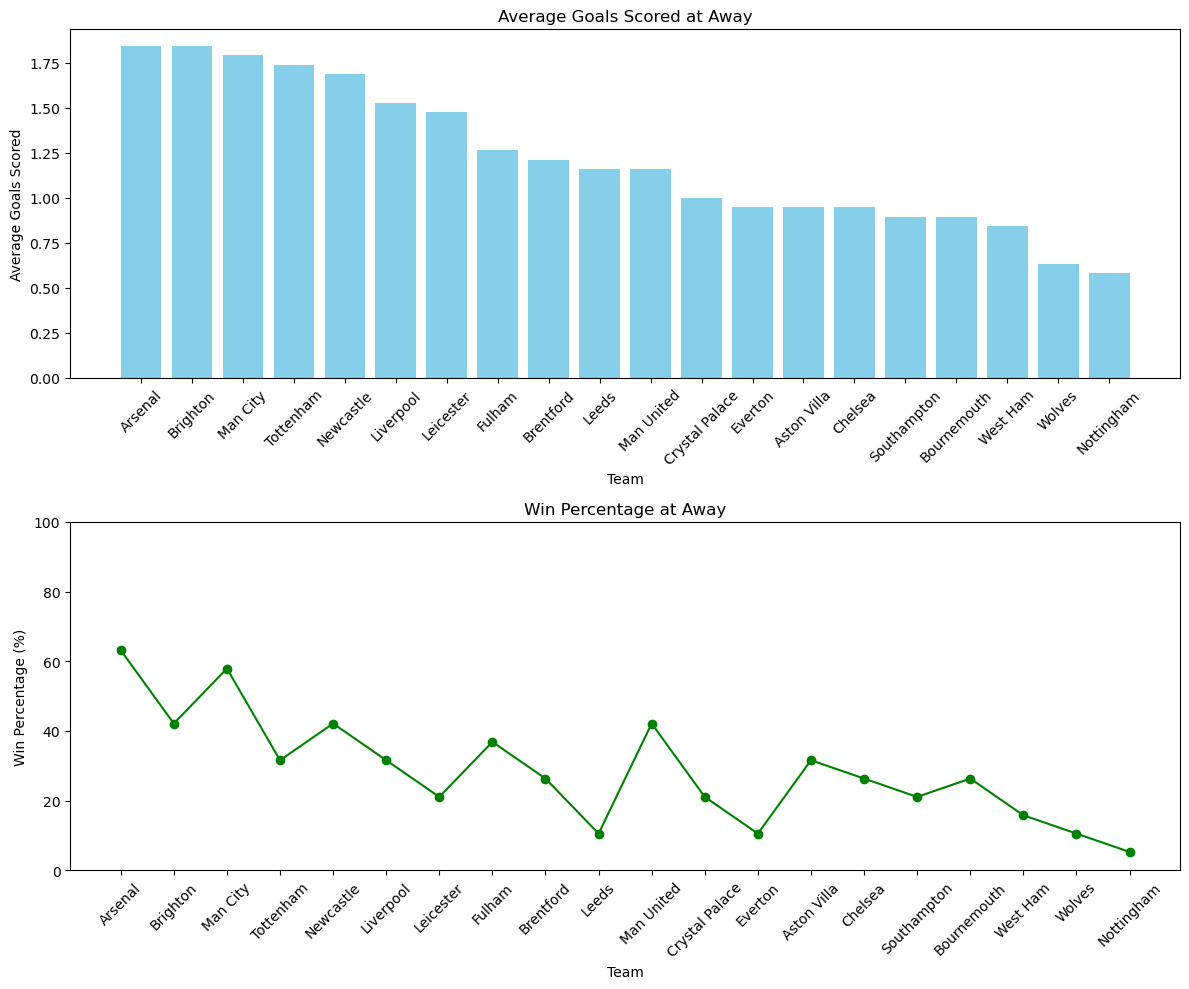

In [67]:
df = pd.DataFrame(away_teams)

# Calculate average goals scored per game at home and win percentage at home
df['AvgGoalsScoredAtAway'] = df['GoalsScoredAtAway'] / df['Games']
df['WinPercentageAtAway'] = (df['WinsAtAway'] / df['Games']) * 100

# Sort the DataFrame by average goals scored at home for better visualization
df_sorted = df.sort_values(by='AvgGoalsScoredAtAway', ascending=False)

# Create plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot 1: Bar plot for average goals scored at home
axes[0].bar(df_sorted['Team'], df_sorted['AvgGoalsScoredAtAway'], color='skyblue')
axes[0].set_title('Average Goals Scored at Away')
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Average Goals Scored')

# Plot 2: Line plot for win percentage at home
axes[1].plot(df_sorted['Team'], df_sorted['WinPercentageAtAway'], marker='o', color='green')
axes[1].set_title('Win Percentage at Away')
axes[1].set_xlabel('Team')
axes[1].set_ylabel('Win Percentage (%)')
axes[1].set_ylim(0, 100)  # Set y-axis limit from 0 to 100 for percentage

# Rotate x-axis labels for better visibility
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

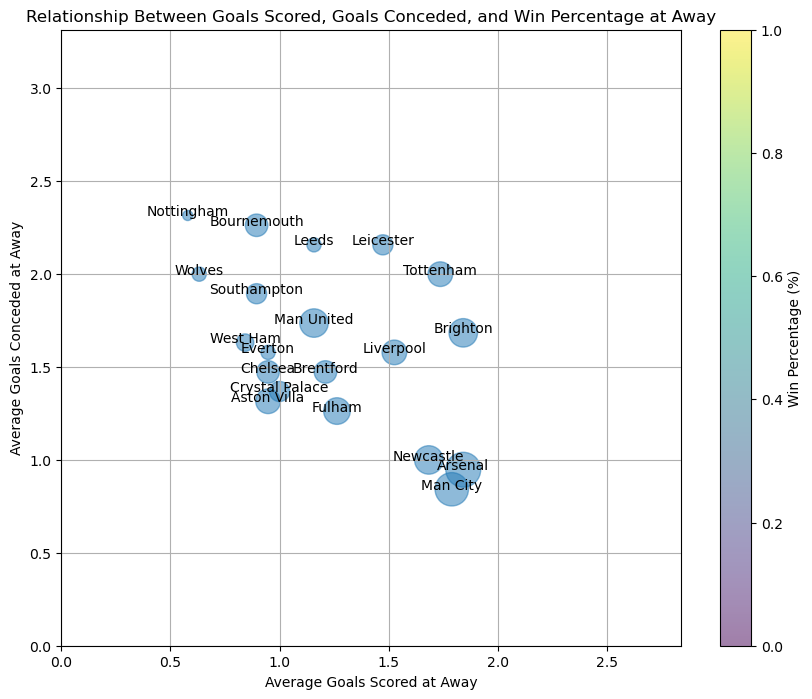

In [68]:
# Calculate average goals scored per game at home, average goals conceded per game at home,
# and win percentage at home
df['AvgGoalsScoredAtAway'] = df['GoalsScoredAtAway'] / df['Games']
df['AvgGoalsConcededAtAway'] = df['GoalsConcededAtAway'] / df['Games']
df['WinPercentageAtAway'] = (df['WinsAtAway'] / df['Games']) * 100

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['AvgGoalsScoredAtAway'], df['AvgGoalsConcededAtAway'], s=df['WinPercentageAtAway']*10, alpha=0.5)
plt.title('Relationship Between Goals Scored, Goals Conceded, and Win Percentage at Away')
plt.xlabel('Average Goals Scored at Away')
plt.ylabel('Average Goals Conceded at Away')
plt.xlim(0, max(df['AvgGoalsScoredAtAway']) + 1)  # Set x-axis limit
plt.ylim(0, max(df['AvgGoalsConcededAtAway']) + 1)  # Set y-axis limit

# Add team labels to each point
for i, txt in enumerate(df['Team']):
    plt.annotate(txt, (df['AvgGoalsScoredAtAway'][i], df['AvgGoalsConcededAtAway'][i]), ha='center')

plt.colorbar(label='Win Percentage (%)')
plt.grid(True)
plt.show()

In [70]:
teams1 = pd.merge(home_teams, away_teams, on='Team')

In [71]:
teams1

,Team,GoalsScoredAtHome,GoalsConcededAtHome,WinsAtHome,Games_x,AvgGoalsScoredAtHome,WinPercentageAtHome,AvgGoalsConcededAtHome,GoalsConcededAtAway,GoalsScoredAtAway,WinsAtAway,Games_y,AvgGoalsScoredAtAway,WinPercentageAtAway,AvgGoalsConcededAtAway
0,Arsenal,53,25,14,19,2.789474,73.684211,1.315789,18,35,12,19,1.842105,63.157895,0.947368
1,Aston Villa,33,21,12,19,1.736842,63.157895,1.105263,25,18,6,19,0.947368,31.578947,1.315789
2,Bournemouth,20,28,6,19,1.052632,31.578947,1.473684,43,17,5,19,0.894737,26.315789,2.263158
3,Brentford,35,18,10,19,1.842105,52.631579,0.947368,28,23,5,19,1.210526,26.315789,1.473684
4,Brighton,37,21,10,19,1.947368,52.631579,1.105263,32,35,8,19,1.842105,42.105263,1.684211
5,Chelsea,20,19,6,19,1.052632,31.578947,1.000000,28,18,5,19,0.947368,26.315789,1.473684
6,Crystal Palace,21,23,7,19,1.105263,36.842105,1.210526,26,19,4,19,1.000000,21.052632,1.368421
7,Everton,16,27,6,19,0.842105,31.578947,1.421053,30,18,2,19,0.947368,10.526316,1.578947
8,Fulham,31,29,8,19,1.631579,42.105263,1.526316,24,24,7,19,1.263158,36.842105,1.263158
9,Leeds,26,37,5,19,1.368421,26.315789,1.947368,41,22,2,19,1.157895,10.526316,2.157895


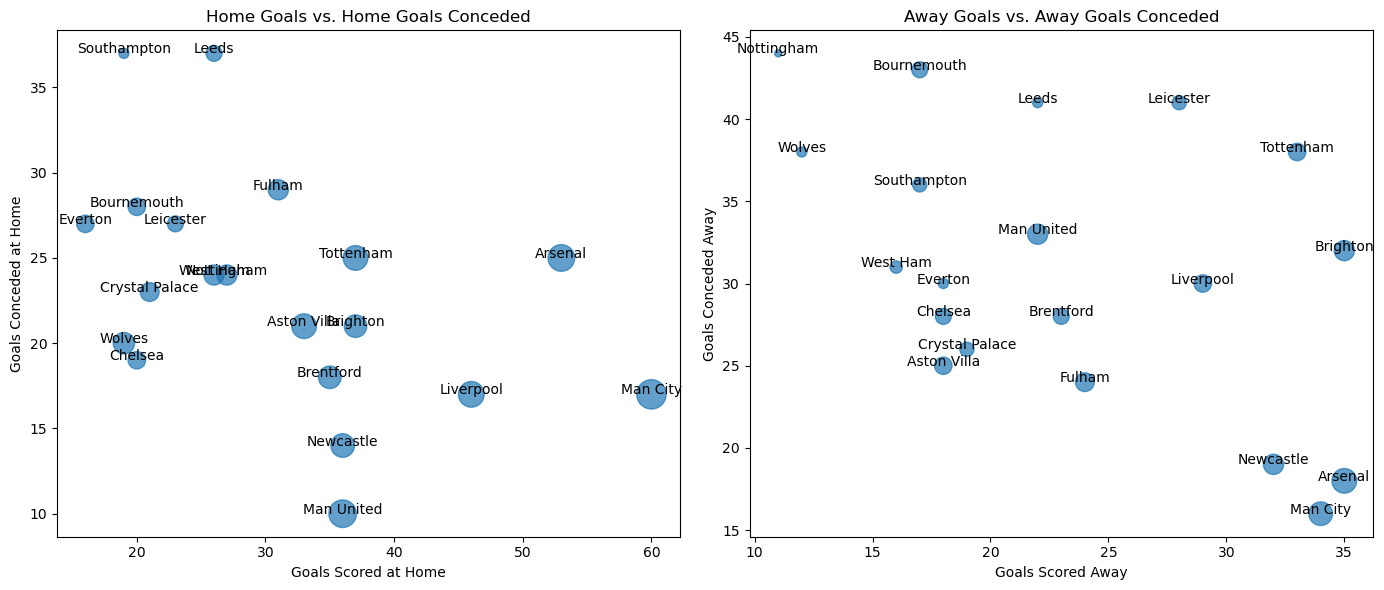

In [76]:
# Create a figure and two subplots for home and away visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Home Goals (x) vs. Home Goals Conceded (y), with marker size representing Win % at Home
axs[0].scatter(df['GoalsScoredAtHome'], df['GoalsConcededAtHome'], s=df['WinPercentageAtHome']*5, alpha=0.7)
axs[0].set_title('Home Goals vs. Home Goals Conceded')
axs[0].set_xlabel('Goals Scored at Home')
axs[0].set_ylabel('Goals Conceded at Home')

# Plot 2: Away Goals (x) vs. Away Goals Conceded (y), with marker size representing Win % Away
axs[1].scatter(df['GoalsScoredAtAway'], df['GoalsConcededAtAway'], s=df['WinPercentageAtAway']*5, alpha=0.7)
axs[1].set_title('Away Goals vs. Away Goals Conceded')
axs[1].set_xlabel('Goals Scored Away')
axs[1].set_ylabel('Goals Conceded Away')

# Add team labels to each point for better understanding
for i, txt in enumerate(df['Team']):
    axs[0].annotate(txt, (df['GoalsScoredAtHome'][i], df['GoalsConcededAtHome'][i]), ha='center')
    axs[1].annotate(txt, (df['GoalsScoredAtAway'][i], df['GoalsConcededAtAway'][i]), ha='center')

plt.tight_layout()
plt.show()